In [2]:
# The code performs logistic/softmax regression on the MNIST Dataset
# It is based upon the tutorial given at Tensorflow.org : https://www.tensorflow.org/get_started/mnist/beginners
# We have added few Tensorboard summaries to understand it better

# Import Modules needed
import tensorflow as tf
import matplotlib.pyplot as plt,  matplotlib.image as mpimg
%matplotlib inline

# Import Input 
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)




Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
# Define Hyper Parameters of the model:
learning_rate = 0.05
batch_size = 100
max_epochs = 100

/home/am/anaconda3/envs/tf_gpu/lib/python3.6/site-packages/matplotlib/text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Text(0.5, 1.0, '[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]')

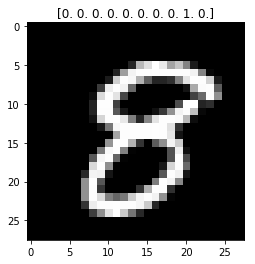

In [4]:
# Visualize the data
i = 55
img = mnist.train.images[i]
img=img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(mnist.train.labels[i])

In [5]:
# Tensorflow graph inputs
x = tf.placeholder(tf.float32, [None, 784], name='X')
y = tf.placeholder(tf.float32, [None, 10],name='Y')

In [6]:
# Learning Variables
W = tf.Variable(tf.zeros([784, 10]), name='W')
b = tf.Variable(tf.zeros([10]), name='b')


In [7]:
# Define the model
with tf.name_scope("wx_b") as scope:
    y_hat = tf.nn.softmax(tf.matmul(x,W) + b)

In [8]:
#Add summary ops to collect data while training
w_h = tf.summary.histogram("weights", W)
b_h = tf.summary.histogram("biases", b)

In [10]:
# Define the cross-entropy loss function
with tf.name_scope('cross-entropy') as scope:
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=y_hat))
    tf.summary.scalar('cross-entropy', loss)
    

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [11]:
# Choose the optimizer
with tf.name_scope('Train') as scope:
    optimizer = tf.train.GradientDescentOptimizer(0.01).minimize(loss)

In [12]:
# Define ops to test trained model
correct_prediction = tf.equal(tf.argmax(y_hat, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [13]:
# Initializing the variables
init = tf.global_variables_initializer()


In [14]:
# Merge All summaries
merged_summary_op = tf.summary.merge_all()

In [15]:
with tf.Session() as sess:
    sess.run(init)  # initialize all variables
    summary_writer = tf.summary.FileWriter('graphs', sess.graph)  # Create an event file
    
    # Training
    for epoch in range(max_epochs):
        loss_avg = 0
        num_of_batch = int(mnist.train.num_examples/batch_size)
        for i in range(num_of_batch):
            batch_xs, batch_ys = mnist.train.next_batch(100)  # get the next batch of data
            _, l, summary_str = sess.run([optimizer,loss, merged_summary_op], feed_dict={x: batch_xs, y: batch_ys})  # Run the optimizer
            loss_avg += l
            summary_writer.add_summary(summary_str, epoch*num_of_batch + i)  # Add all summaries per batch
            
        loss_avg = loss_avg/num_of_batch
        print('Epoch {0}: Loss {1}'.format(epoch, loss_avg))
    
    print('Done')
    
    print(sess.run(accuracy, feed_dict={x: mnist.test.images,y: mnist.test.labels}))
    

    

Epoch 0: Loss 2.250762136632746
Epoch 1: Loss 2.0906084966659546
Epoch 2: Loss 1.9609185164624994
Epoch 3: Loss 1.8829452696713533
Epoch 4: Loss 1.8336594533920287
Epoch 5: Loss 1.8016876396265897
Epoch 6: Loss 1.7796502843770114
Epoch 7: Loss 1.763462169820612
Epoch 8: Loss 1.750979472723874
Epoch 9: Loss 1.7410100310499017
Epoch 10: Loss 1.7328474621339278
Epoch 11: Loss 1.7259811691804365
Epoch 12: Loss 1.7201268610087308
Epoch 13: Loss 1.7150548605485396
Epoch 14: Loss 1.710605344989083
Epoch 15: Loss 1.7066578071767633
Epoch 16: Loss 1.7031172314557161
Epoch 17: Loss 1.699915686303919
Epoch 18: Loss 1.6970088815689086
Epoch 19: Loss 1.6943307915600863
Epoch 20: Loss 1.6918524323810231
Epoch 21: Loss 1.6895337436415931
Epoch 22: Loss 1.6873282222314314
Epoch 23: Loss 1.6851794437928633
Epoch 24: Loss 1.6829830048301002
Epoch 25: Loss 1.6804621078751303
Epoch 26: Loss 1.676789542544972
Epoch 27: Loss 1.670560937578028
Epoch 28: Loss 1.6638360316103156
Epoch 29: Loss 1.65888605161146